In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns #For getting the heatmap

In [18]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Analysis and Pre-Processing

In [19]:
df.groupby('diagnosis').count()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

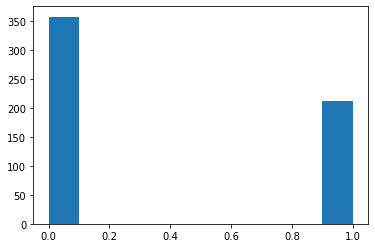

In [20]:
df = df.drop(df[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
df[['diagnosis']] = df[['diagnosis']].replace(['M'], 1).replace(['B'], 0) #replacing Malignant with 1s and Benign with 0s
plt.hist(df['diagnosis'])

In [21]:
# max_threshold=df['radius_worst'].quantile(0.95)
# min_threshold=df['radius_worst'].quantile(0.05)
# # df = df[(df['radius_worst']>min_threshold) & (df['radius_worst']<max_threshold)]
names = df.columns
from sklearn.preprocessing import normalize
nr = normalize(df,axis=1)
dfnr= pd.DataFrame(nr, columns = names)


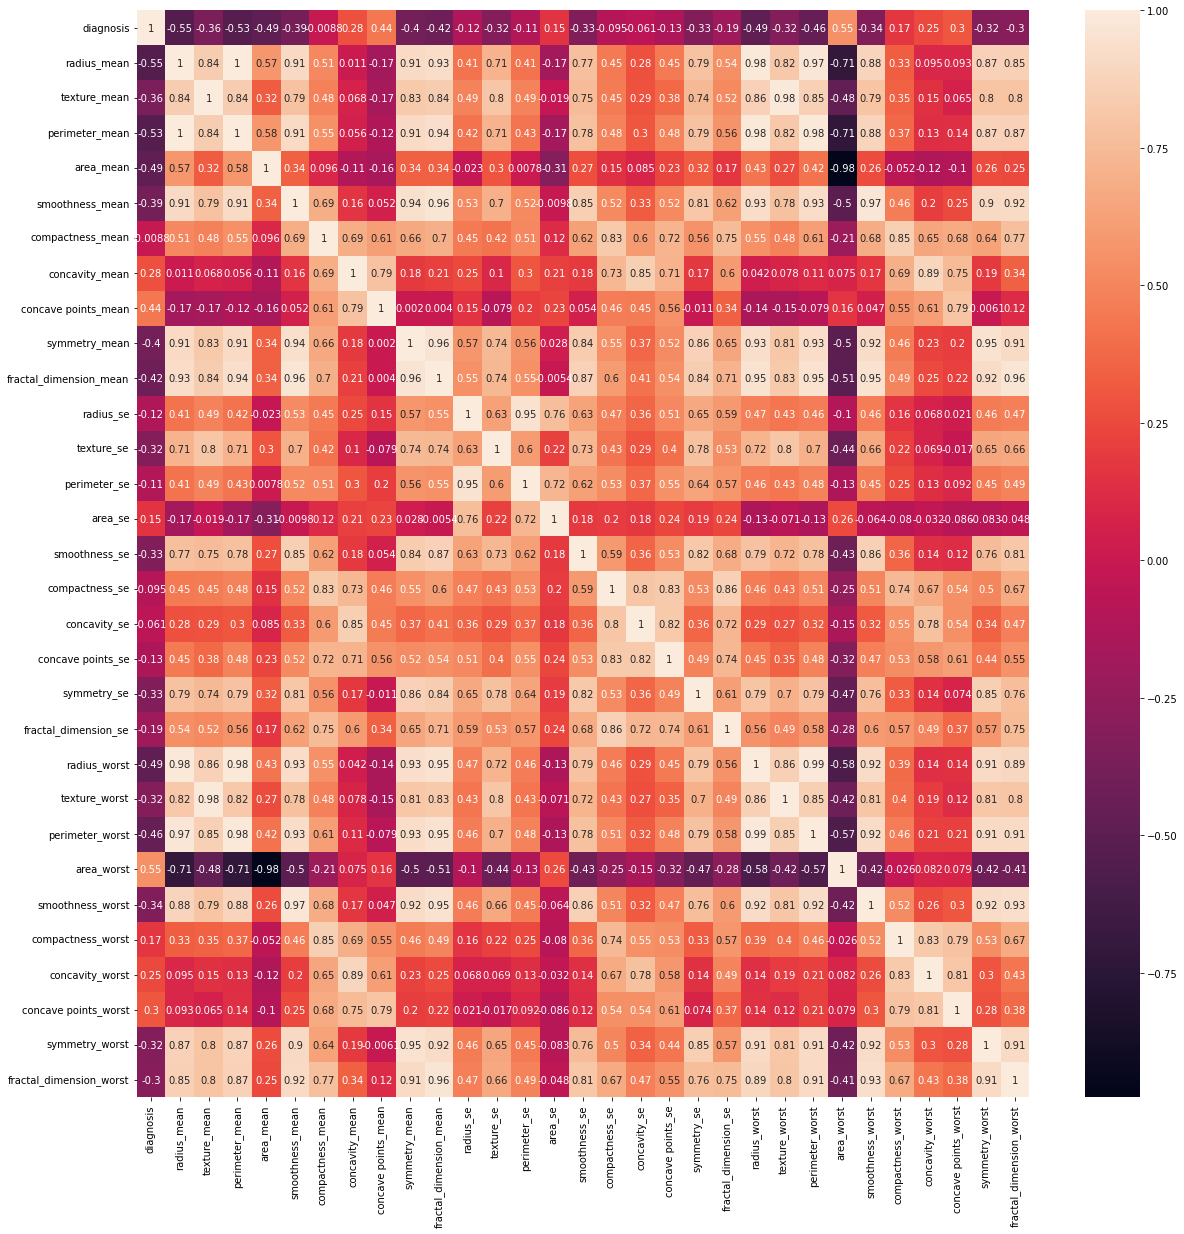

diagnosis                  1.000000
area_worst                 0.546024
concave points_mean        0.442163
concave points_worst       0.304386
concavity_mean             0.280479
concavity_worst            0.245779
compactness_worst          0.167279
area_se                    0.153649
compactness_mean          -0.008796
concavity_se              -0.060586
compactness_se            -0.094904
perimeter_se              -0.111638
radius_se                 -0.123139
concave points_se         -0.130489
fractal_dimension_se      -0.189522
fractal_dimension_worst   -0.299794
symmetry_worst            -0.317297
texture_se                -0.319246
texture_worst             -0.319864
smoothness_se             -0.328854
symmetry_se               -0.334557
smoothness_worst          -0.335578
texture_mean              -0.364838
smoothness_mean           -0.387846
symmetry_mean             -0.395798
fractal_dimension_mean    -0.419340
perimeter_worst           -0.455364
area_mean                 -0

In [16]:
corel_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corel_matrix, annot = True)
plt.show()
corel_matrix.diagnosis.sort_values(ascending= False)

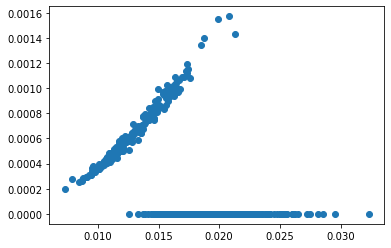

In [22]:
plt.scatter(df['radius_worst'], df['diagnosis'])

# Splitting the Data 

In [23]:
train = df.sample(frac = 0.75, random_state= 200)
test = df.drop(train.index)
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
225,0.000000,0.013103,0.012308,0.084532,0.585904,0.000091,0.000070,0.000052,0.000042,0.000190,...,0.015324,0.015443,0.100879,0.797896,0.000119,0.000139,0.000149,0.000099,0.000280,0.000055
385,0.000981,0.014323,0.022848,0.092186,0.652080,0.000085,0.000065,0.000082,0.000052,0.000160,...,0.015490,0.031108,0.100260,0.743805,0.000129,0.000155,0.000262,0.000133,0.000243,0.000067
338,0.000000,0.019905,0.034720,0.127569,0.615564,0.000199,0.000145,0.000050,0.000035,0.000374,...,0.022103,0.053159,0.142562,0.760542,0.000278,0.000278,0.000209,0.000129,0.000573,0.000152
458,0.000000,0.015728,0.030403,0.099944,0.629350,0.000101,0.000061,0.000015,0.000021,0.000202,...,0.017349,0.038569,0.110167,0.760374,0.000147,0.000132,0.000054,0.000072,0.000279,0.000076
495,0.000000,0.014179,0.019271,0.091652,0.649252,0.000091,0.000080,0.000065,0.000047,0.000142,...,0.015266,0.027156,0.099071,0.747178,0.000116,0.000132,0.000162,0.000097,0.000226,0.000063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.000294,0.006905,0.007128,0.045555,0.513117,0.000031,0.000038,0.000068,0.000041,0.000053,...,0.009008,0.009026,0.059448,0.853530,0.000044,0.000079,0.000142,0.000061,0.000076,0.000023
284,0.000000,0.016129,0.019645,0.105206,0.646400,0.000098,0.000120,0.000140,0.000042,0.000179,...,0.017392,0.024637,0.115266,0.745249,0.000124,0.000290,0.000418,0.000127,0.000250,0.000089
546,0.000000,0.020079,0.031810,0.127067,0.632124,0.000184,0.000097,0.000020,0.000011,0.000367,...,0.021888,0.042356,0.138371,0.748860,0.000250,0.000172,0.000085,0.000046,0.000522,0.000144
482,0.000000,0.015533,0.016213,0.100691,0.629954,0.000123,0.000133,0.000067,0.000061,0.000205,...,0.017101,0.021125,0.109478,0.761295,0.000161,0.000288,0.000213,0.000154,0.000372,0.000108


**Taking concave_points_worst as the input feature for the regression**

In [24]:
def univariate_logistic_regression(x, y, alpha =0.001):
    m = x.shape[0]
    cost_list= []
    w = 0
    b = 0
    change = 1
    cost_prev =1
    pred_list=[]
    while change >1e-6 :
        line = w * x + b
        ypred = 1 / ( 1 + np.exp(-line))
        error = y-ypred
        cost = (1/m) * np.dot(error.T, error)
        
        dw = (-2/m) * np.sum(error * x)
        db = (-2/m) * np.sum(error)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        cost_list.append(cost)
        change = abs(cost_prev - cost)
        cost_prev = cost
    return cost_list, w, b

In [25]:
x = train['radius_worst']
y = train['diagnosis']
y.shape

(427,)

In [26]:
# cost_list, w, b = univariate_logistic_regression(x,y)
cost_list[-1]

NameError: name 'cost_list' is not defined

0.26475376716429455
-4.724639840966513


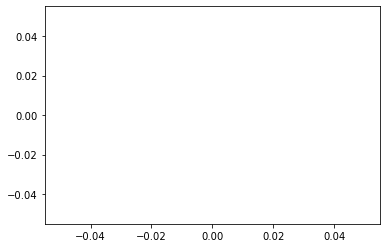

In [ ]:
plt.plot(cost_list)
print(w)
print(b)

# Testing the Model with the Test data

In [ ]:
def predict(x, w, b) :
    prediction = []
    line = w * x + b
    ypred = 1 / ( 1 + np.exp(-line))
    for predict in ypred:
        if predict >= .40: #bias of 0.6 given to malignant Cancers
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, line, ypred 

**Test data**

In [ ]:
x = test['radius_worst']
y = test['diagnosis']
prediction, line, ypred = predict(x, w, b)

**Calculating the Score using sklearn metrics**

In [ ]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y, prediction)
print('F1 Score : ', F1_Score)


F1 Score :  0.9137931034482759


# Visualising the result

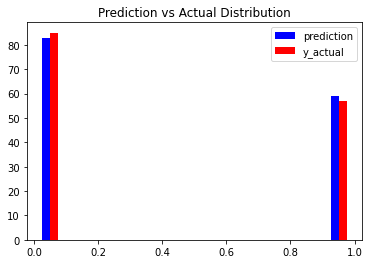

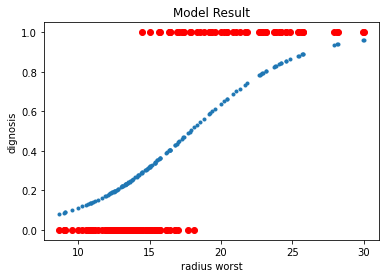

In [ ]:
y_and_ypred = [prediction, y]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()

plt.scatter(x, ypred, marker='.')
plt.scatter(x,y, color = "red")
plt.xlabel('radius worst')
plt.ylabel('dignosis')
plt.title('Model Result')
plt.show()

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Multivariate 

In [ ]:
def multivariate_logistic_regression(x, y, alpha =0.0005):
    m = x.shape[0] # no of rows
    n = x.shape[1] # no of features
    x = np.hstack((np.ones((m,1)), x)) 
    θ = np.zeros(n+1)
    change = 1
    cost_prev =1
    cost_list=[]
    ypred_list = []
    while change >1e-6 :
        lines  = np.dot(x, θ)
        ypred = sigmoid(lines)
        error = ypred - y
        
        cost = -(1/m)* np.sum(y*np.log(ypred) +(1-y)*np.log(1-ypred))
        
        θ = θ - alpha * ((1/m) * np.dot(x.T,error))
               
        cost_list.append(cost)
        ypred_list.append(ypred)

        change = abs(cost_prev - cost)
        cost_prev = cost
        print(cost)
    return cost_list, θ, ypred

In [ ]:
x = train[['perimeter_worst', 'concavity_mean']]
y = train.diagnosis
cost_list, θ, ypred_list = multivariate_logistic_regression(x,y)
cost_list[-1]

NameError: name 'train' is not defined

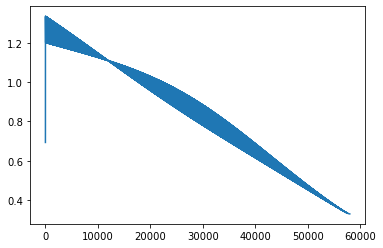

In [ ]:
plt.plot(cost_list)

In [ ]:
def predict_multi(x,θ) :
    prediction = []
    lines = np.dot(x,θ)
    ypred = 1 / ( 1 + np.exp(-lines))
    for predict in ypred:
        if predict >= .40: #bias of 0.6 given to malignant Cancers
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, line, ypred 